LEVEL 0

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.image as img

In [ ]:
#Loading the dataset
df=pd.DataFrame(pd.read_csv("data.csv"))
df

In [ ]:
#Displaying the shape of the dataset
print(df.shape)

(60000, 785)


In [44]:
#Checking if the image is grayscale or not

# Extract the pixel data (assuming the first column is the label and the rest are pixels)
image_data = df.iloc[:, 1:].values  # Excluding the first column (assuming labels are in the first column)

# Check the number of pixel values in the first image
first_image = image_data[0]

# Get the number of pixel values per image
num_pixel_values = first_image.shape[0]

# Check if the number of pixel values indicates grayscale or RGB
if num_pixel_values == 28 * 28:  # For a 28x28 grayscale image
    print("The image is grayscale.")
elif num_pixel_values == 28 * 28 * 3:  # For a 28x28 RGB image
    print("The image is RGB (colored).")
else:
    print(f"The image has {num_pixel_values} pixels, which doesn't match the standard formats.")

The image is grayscale.


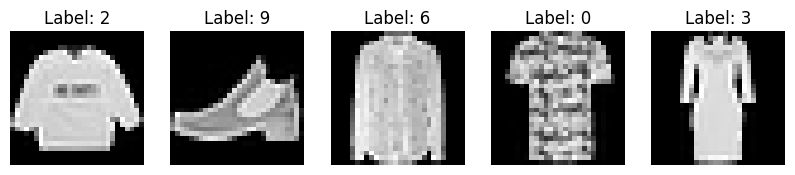

In [ ]:
#Displaying few images together with their labels


# Load the dataset (assuming it's a CSV file)

# Extract the labels (assuming the first column contains labels)
labels = df.iloc[:, 0].values  # Assuming the first column is the label

# Extract the pixel data (assuming the rest of the columns contain pixel data)
image_data = df.iloc[:, 1:].values  # Exclude the first column which is the label

# Assuming each image is 28x28 pixels (784 values per image)
image_size = 28
num_images_to_show = 5  # Number of images to display

# Set up the plot with subplots
plt.figure(figsize=(10, 4))  # Adjust the size of the figure (optional)

# Display only the first few images with their labels
for i in range(num_images_to_show):
    # Get the image and reshape it from a flattened vector to a 28x28 matrix
    image = image_data[i].reshape(image_size, image_size)

    # Create a subplot and display the image
    plt.subplot(1, num_images_to_show, i + 1)  # 1 row, num_images_to_show columns
    plt.imshow(image, cmap='gray')  # Display the image in grayscale
    plt.title(f"Label: {labels[i]}")  # Add the label as the title
    plt.axis('off')  # Hide axis for a cleaner display

# Show the images
plt.show()


LEVEL 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.image as img

In [3]:
#Loading the dataset
df=pd.DataFrame(pd.read_csv("data.csv"))
display(df)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


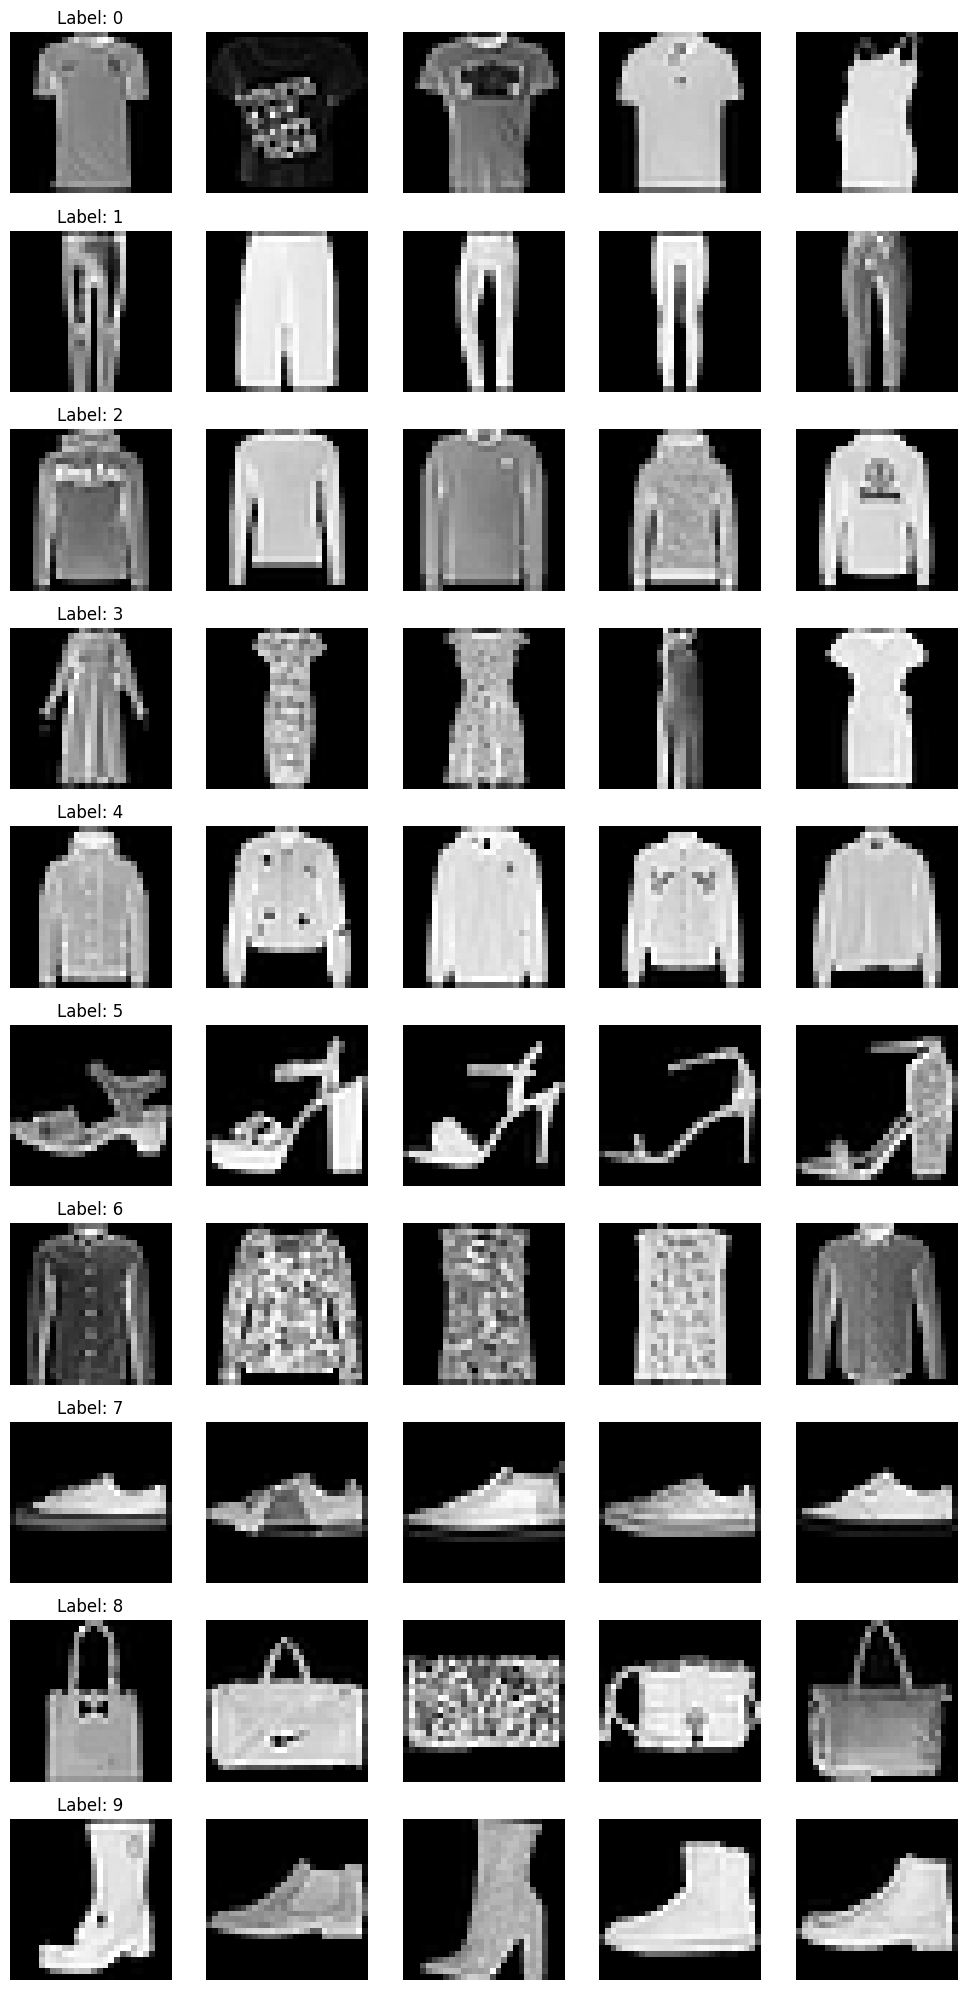

In [ ]:
#Displaying 5 images of each labels



# Extract the labels (assuming the first column contains labels)
labels = df.iloc[:, 0].values  # Assuming the first column is the label

# Extract the pixel data (assuming the rest of the columns contain pixel data)
image_data = df.iloc[:, 1:].values  # Exclude the first column which is the label

# Assuming each image is 28x28 pixels (784 values per image)
image_size = 28
num_images_per_label = 5  # Number of images to display per label

# Get unique labels
unique_labels = np.unique(labels)

# Calculate the number of rows (one row per label)
num_rows = len(unique_labels)

# Set up the figure
fig, axes = plt.subplots(num_rows, num_images_per_label, figsize=(num_images_per_label * 2, num_rows * 2))

# Iterate through each unique label
for i, label in enumerate(unique_labels):
    # Get indices of images with the current label
    indices = np.where(labels == label)[0]

    # Select 5 images randomly (or all if less than 5 available)
    selected_indices = np.random.choice(indices, min(num_images_per_label, len(indices)), replace=False)

    for j, idx in enumerate(selected_indices):
        image = image_data[idx].reshape(image_size, image_size)  # Reshape to 28x28

        # Display the image
        ax = axes[i, j] if num_rows > 1 else axes[j]  # Handle single-row case
        ax.imshow(image, cmap='gray')
        ax.axis("off")

        # Label the first image in each row with the category name
        if j == 0:
            ax.set_title(f"Label: {label}", fontsize=12)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [ ]:
#Summary statistics for pixel values


# Extract pixel data (excluding the first column which contains labels)
image_data = df.iloc[:, 1:].values  # Shape: (num_samples, num_pixels)

# Compute summary statistics
summary_stats = {
    "Mean": np.mean(image_data),
    "Standard Deviation": np.std(image_data),
    "Min Value": np.min(image_data),
    "Max Value": np.max(image_data),
    "Median": np.median(image_data),
    "25th Percentile": np.percentile(image_data, 25),
    "75th Percentile": np.percentile(image_data, 75)
}

# Convert to DataFrame for better visualization
summary_df = pd.DataFrame(summary_stats, index=["Pixel Statistics"])
print(summary_df)


                       Mean  Standard Deviation  Min Value  Max Value  Median  \
Pixel Statistics  72.956831           89.966863          0        255     0.0   

                  25th Percentile  75th Percentile  
Pixel Statistics              0.0            163.0  


LEVEL2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.image as img
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Preprocessing and normalizing the data


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def preprocess_data(df):
    """
    Preprocesses the dataset:
    - Extracts labels and pixel values.
    - Normalizes pixel values to range [0, 1].
    - Splits data into training and testing sets.
    - Standardizes features for logistic regression.
    
    Returns: X_train, X_test, y_train, y_test
    """

    # 🔹 Extract labels (first column) and pixel values (remaining columns)
    labels = df.iloc[:, 0].values
    image_data = df.iloc[:, 1:].values

    # 🔹 Normalize pixel values (scale between 0 and 1)
    image_data = image_data / 255.0  

    # 🔹 Split data into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(
        image_data, labels, test_size=0.2, random_state=42, stratify=labels
    )

    # 🔹 Standardize the dataset (important for logistic regression)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


# Example Usage:
# df = pd.read_csv("your_dataset.csv")  # Uncomment to load the dataset
# X_train, X_test, y_train, y_test = preprocess_data(df)



In [15]:
#Splitting the dataset into test and training subsets where 80% is trained and 20% is tested.
from sklearn.model_selection import train_test_split



# 🔹 Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    image_data, labels, test_size=0.2, random_state=42, stratify=labels
)

# 🔹 Print dataset shapes
print(f"Training Set: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing Set: {X_test.shape}, Labels: {y_test.shape}")

Training Set: (48000, 784), Labels: (48000,)
Testing Set: (12000, 784), Labels: (12000,)


c:\Users\Pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model Accuracy: 0.8415
Log Loss: 0.5143

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1200
           1       0.95      0.97      0.96      1200
           2       0.76      0.75      0.76      1200
           3       0.85      0.84      0.85      1200
           4       0.75      0.80      0.78      1200
           5       0.92      0.91      0.92      1200
           6       0.63      0.57      0.60      1200
           7       0.90      0.92      0.91      1200
           8       0.93      0.92      0.92      1200
           9       0.93      0.93      0.93      1200

    accuracy                           0.84     12000
   macro avg       0.84      0.84      0.84     12000
weighted avg       0.84      0.84      0.84     12000



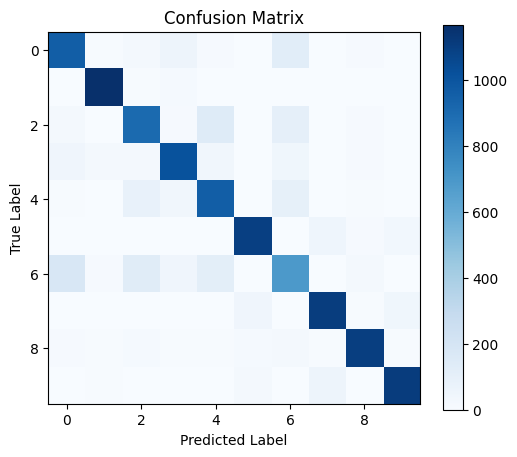

In [19]:
#Implementing algorithm using scikit learn library and training the model and evaluating loss metrics and accuracy


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss

X_train, X_test, y_train, y_test = preprocess_data(df)

# 🔹 Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=10000, solver='lbfgs', multi_class='multinomial', verbose=1)
log_reg.fit(X_train, y_train)

# 🔹 Make predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)  # Probabilities for log-loss calculation

# 🔹 Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
loss = log_loss(y_test, y_pred_proba)  # Log-loss (cross-entropy loss)

print(f"Model Accuracy: {accuracy:.4f}")
print(f"Log Loss: {loss:.4f}")

# 🔹 Show classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 🔹 Display Confusion Matrix
plt.figure(figsize=(6, 5))
plt.imshow(confusion_matrix(y_test, y_pred), cmap="Blues", interpolation="nearest")
plt.colorbar()
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



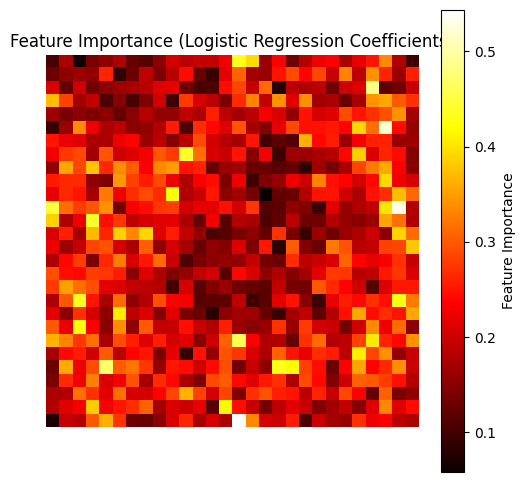

In [20]:
#Implementing Explainable AI techniques to interpret model decisions and feature importance


#Feature Importance using Coefficients
import numpy as np
import matplotlib.pyplot as plt

# Get the absolute values of model coefficients
feature_importance = np.abs(log_reg.coef_).mean(axis=0)  # Average importance across classes

# Reshape into an image format (assuming 28x28 images)
image_size = 28
feature_importance_image = feature_importance.reshape(image_size, image_size)

# Plot feature importance
plt.figure(figsize=(6,6))
plt.imshow(feature_importance_image, cmap='hot', interpolation='nearest')
plt.colorbar(label="Feature Importance")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.axis('off')
plt.show()

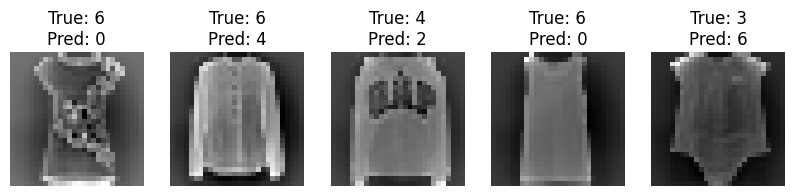

In [ ]:
#Implementing Explainable AI techniques to interpret model decisions and feature importance


#Visualizing Misclassified Images
import random

# Find misclassified images
misclassified_idx = np.where(y_test != y_pred)[0]

# Select a few misclassified images
num_images = 5
random_images = random.sample(list(misclassified_idx), num_images)

plt.figure(figsize=(10, 4))

for i, idx in enumerate(random_images):
    image = X_test[idx].reshape(image_size, image_size)
    true_label = y_test[idx]
    predicted_label = y_pred[idx]
    
    plt.subplot(1, num_images, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')

plt.show()

In [ ]:
#Implementing Explainable AI techniques to interpret model decisions and feature importance


#SHAP for Global & Local Interpretability
import shap

# Create SHAP explainer for logistic regression
explainer = shap.Explainer(log_reg, X_train)
shap_values = explainer(X_test)

# 🔹 Visualize Global Feature Importance
shap.summary_plot(shap_values, X_test)

# 🔹 Visualize Single Prediction Explanation
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test[0])

LEVEL 3

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [27]:
#Splitting the dataset into test and training subsets where 80% is trained and 20% is tested.
from sklearn.model_selection import train_test_split



# 🔹 Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    image_data, labels, test_size=0.2, random_state=42, stratify=labels
)

# 🔹 Print dataset shapes
print(f"Training Set: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing Set: {X_test.shape}, Labels: {y_test.shape}")

Training Set: (48000, 784), Labels: (48000,)
Testing Set: (12000, 784), Labels: (12000,)


In [28]:
# Define the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(128, 64),  # Two hidden layers (128 and 64 neurons)
                    activation='relu',             # Use ReLU activation function
                    solver='adam',                 # Adam optimizer
                    max_iter=20,                   # Train for 20 epochs
                    random_state=42,
                    verbose=True)

# Train the model
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.62132257
Iteration 2, loss = 0.41580953
Iteration 3, loss = 0.37388467
Iteration 4, loss = 0.34901392
Iteration 5, loss = 0.33028095
Iteration 6, loss = 0.31303802
Iteration 7, loss = 0.29549126
Iteration 8, loss = 0.28647269
Iteration 9, loss = 0.27803173
Iteration 10, loss = 0.26504573
Iteration 11, loss = 0.25838800
Iteration 12, loss = 0.25019647
Iteration 13, loss = 0.24203187
Iteration 14, loss = 0.23781312
Iteration 15, loss = 0.22699459
Iteration 16, loss = 0.22459717
Iteration 17, loss = 0.21702894
Iteration 18, loss = 0.21330477
Iteration 19, loss = 0.20665651
Iteration 20, loss = 0.19897058


c:\Users\Pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=20, random_state=42,
              verbose=True)


Test Accuracy: 0.8915

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1200
           1       0.98      0.98      0.98      1200
           2       0.86      0.80      0.83      1200
           3       0.88      0.91      0.89      1200
           4       0.77      0.88      0.82      1200
           5       0.98      0.94      0.96      1200
           6       0.77      0.69      0.73      1200
           7       0.94      0.95      0.94      1200
           8       0.97      0.97      0.97      1200
           9       0.94      0.96      0.95      1200

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000



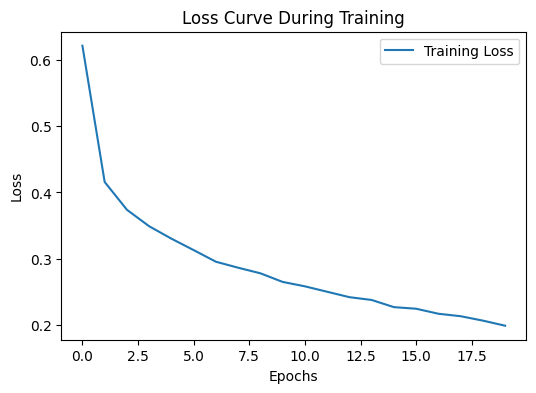

In [34]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
y_pred = mlp.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nTest Accuracy:", accuracy)

# Show classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the loss curve
plt.figure(figsize=(6, 4))
plt.plot(mlp.loss_curve_, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve During Training")
plt.legend()
plt.show()

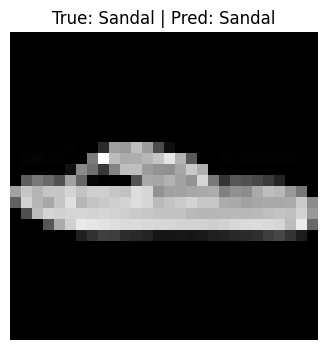

In [ ]:
# Class names for labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
# Function to plot an image with its prediction
def plot_image(index):
    plt.figure(figsize=(4, 4))
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[y_test[index]]} | Pred: {class_names[y_pred[index]]}")
    plt.axis('off')
    plt.show()

# Show a random test image
plot_image(0)